In [72]:
import numpy as np
from typing import Tuple

In [73]:
np.random.choice([8,10], size=10)

array([ 8,  8,  8,  8, 10,  8, 10, 10,  8,  8])

In [ ]:
scattering_rules = {
    0b001001: (0b100100, 0b010010),
    0b010010: (0b001001, 0b100100),
    0b100100: (0b001001, 0b010010),
    0b010101: (0b101010,),
    0b101010: (0b010101,)
}

even_row_neighbors = np.array([
    [0, 1],
    [-1, 0],
    [-1, -1],
    [0, -1],
    [1, -1],
    [1, 0]
])
odd_row_neighbors = np.array([
    [0, 1],
    [-1, -1],
    [-1, 0],
    [0, -1],
    [1, 0],
    [1, 1]
])

bit_to_neighbor = {
    1: ((0, 1), (0, 1)),
    2: ((-1, 0), (-1, -1)),
    4: ((-1, -1), (-1, 0)),
    8: ((0, -1), (0, -1)),
    16: ((1, -1), (1, 0)),
    32: ((1, 0), (1,1))
}

def generate_lattice(N_x: int, N_y: int) -> np.ndarray:
    shape = (N_x, N_y)
    lattice = np.random.randint(0, 64, size=shape).astype(np.uint8)
    return lattice

def apply_collisions(lattice: np.ndarray) -> np.ndarray:
    new_lattice = lattice.copy()
    for input, outputs in scattering_rules.items():
        input_mask = lattice == input
        output_result = np.random.choice(outputs, size=np.sum(input_mask))
        new_lattice[input_mask] = output_result
    return new_lattice

def move_particles(lattice: np.ndarray) -> np.ndarray:
    next_lattice = np.zeros_like(lattice)
    for i in range(lattice.shape[0]):
        for j in range(lattice.shape[0]):
            value = next_lattice[i,j]
            for bit, neighbor in bit_to_neighbor.items():
                if value & bit:
                    new_site = add_indices(site, neighbor)
                    if new_site not in lattice:
                        bit = reflective_rules[bit]
                        new_site = site
                    new_lattice[new_site] |= bit


In [88]:
1 % 2

1

In [75]:
print(scattering_rules)

{9: (36, 18), 18: (9, 36), 36: (9, 18), 21: (42,), 42: (21,)}


In [76]:
lattice = generate_lattice(10, 10)
print(lattice)
apply_collisions(lattice)

[[10 20 62 62 28 10 51 55 56  7]
 [57  9 34 29 36 17 19  5 53 44]
 [63 51 34 20 23  2 46 60 17 23]
 [47 33 17  4 58 49 52 51 43 55]
 [50  0 44 39 12  9 21 56 19 29]
 [35  7 34 41 34 21  9  9  8  8]
 [ 2 60 23  6  5  0 41 63  6 50]
 [25 18 50 37 20 17 19 23 53 27]
 [18 25 55  1 48 48 50  6 46 63]
 [29  3 27 22 33  1 20 26 56 46]]


array([[10, 20, 62, 62, 28, 10, 51, 55, 56,  7],
       [57, 36, 34, 29,  9, 17, 19,  5, 53, 44],
       [63, 51, 34, 20, 23,  2, 46, 60, 17, 23],
       [47, 33, 17,  4, 58, 49, 52, 51, 43, 55],
       [50,  0, 44, 39, 12, 18, 42, 56, 19, 29],
       [35,  7, 34, 41, 34, 42, 18, 36,  8,  8],
       [ 2, 60, 23,  6,  5,  0, 41, 63,  6, 50],
       [25, 36, 50, 37, 20, 17, 19, 23, 53, 27],
       [ 9, 25, 55,  1, 48, 48, 50,  6, 46, 63],
       [29,  3, 27, 22, 33,  1, 20, 26, 56, 46]], dtype=int32)

In [ ]:
odd_rows = odd_row_indices(lattice.shape)
lattice[odd_rows[:,0], odd_rows[:,1]]

array([57,  9, 34, 29, 36, 17, 19,  5, 53, 44, 47, 33, 17,  4, 58, 49, 52,
       51, 43, 55, 35,  7, 34, 41, 34, 21,  9,  9,  8,  8, 25, 18, 50, 37,
       20, 17, 19, 23, 53, 27, 29,  3, 27, 22, 33,  1, 20, 26, 56, 46],
      dtype=int32)

In [86]:
odd_rows + odd_row_neighbors

ValueError: operands could not be broadcast together with shapes (50,2) (6,2) 

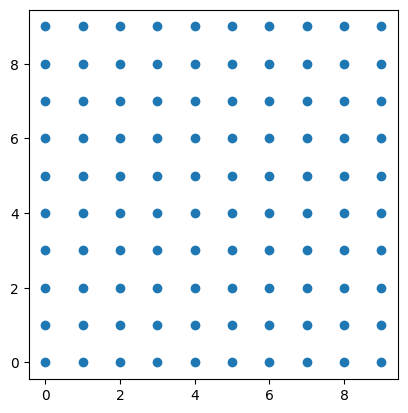

In [89]:
import matplotlib.pyplot as plt

indices = np.indices(lattice.shape)
plt.scatter(indices[0,:].flatten(), indices[1,:].flatten())
plt.gca().set_aspect('equal')
plt.show()